# Прогноз оттока клиентов



**Цели и задачи проекта**

Цель - построение модели, позволяющей предсказать отток клиента и по данной информации провести маркетинговые дейсвия по удержанию пользователей.  

задача - обработка данных, приведение к виду, необходимому для построения модели, а также построение и тестрование baseline. 
Задача бинарной классификации: 0 или 1
Всего объектов 40 000 пользователей. по каждому из них даны 230 описательных признака.


**Методика измерения качества и критерий успеха**

В силу того, что данные не сбалансированы была, выбрана метрика РОООК АУК. Доп метрикой - Ф мера.
Проверка кач-ва проводилась с помощью кросс валидации (stratified k-fold). Модель выбиралась по макс. результату на кросс валидации

**Техническое описание решения**

Данные были разреженны. очень много NaNов ( более 95% в признаке). Среди коррелирующих признаков была видна разница в плотоности относительно целевого признака , например Var53. Были вещественные признаки с 3 - 4 значениями, например Var173

Шумовые признаки были удалены. Nanы заполнеты средники для числовых значений и самыми попуярными для категоиральных. Кат признаки были преобразованы с помощью get_dummies 

На кросс валидации были протестированы 4 классификатора/ансамбля (RidgeClassifier, RandomForestClassifier, ensemble.GradientBoostingClassifier, xgb.XGBClassifier)

xgb оказался чуть лучше по рок ауку. но хуже по реколу. Так как рекол в задачах с ошибкой 2 рода важнее - заюзал xgb из скайлерна

65 деревьев оптимально число деревьев в ансамбле  - число было деревьев выбрано с помощью критериев стат значимости. 

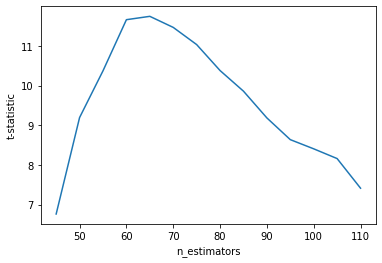

**Возможные эффекты от внедрения модели**

при вероятности принятия предложения о скидке ( 20/30 или 50) разный профит

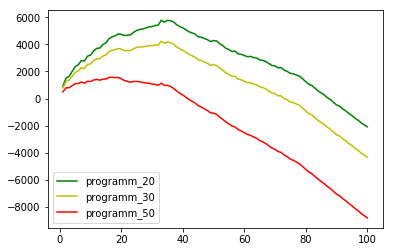

в задачах на отток более важным явдяется ошибка второго рода. ее и нужно уменьшать. или иными словами повышть recall. recall - это доля угаданных положительных классов ,среди всех положильтеных классов. Увелить его можно только уменьши false negative ответа - иными словами, нам нужно понизить threshold (порог, по которому будем принимать решение отток /не отток), увеличив мощность модели, но тогда упадет precision. Вопрос баланса/ без четкого понимая сколько стоит каждый абонент задачу не решить. Бизнес  - дай инфу!

